d:\github\2H_TaSe2_Tc_STM\topological_encoding


In [ ]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))




['C:\\Users\\user\\AppData\\Local\\Programs\\Python\\Python312\\python312.zip', 'C:\\Users\\user\\AppData\\Local\\Programs\\Python\\Python312\\DLLs', 'C:\\Users\\user\\AppData\\Local\\Programs\\Python\\Python312\\Lib', 'C:\\Users\\user\\AppData\\Local\\Programs\\Python\\Python312', 'd:\\github\\2H_TaSe2_Tc_STM\\2Hvenv', '', 'd:\\github\\2H_TaSe2_Tc_STM\\2Hvenv\\Lib\\site-packages', 'd:\\github\\2H_TaSe2_Tc_STM\\2Hvenv\\Lib\\site-packages\\win32', 'd:\\github\\2H_TaSe2_Tc_STM\\2Hvenv\\Lib\\site-packages\\win32\\lib', 'd:\\github\\2H_TaSe2_Tc_STM\\2Hvenv\\Lib\\site-packages\\Pythonwin']
['C:\\Users\\user\\AppData\\Local\\Programs\\Python\\Python312\\python312.zip', 'C:\\Users\\user\\AppData\\Local\\Programs\\Python\\Python312\\DLLs', 'C:\\Users\\user\\AppData\\Local\\Programs\\Python\\Python312\\Lib', 'C:\\Users\\user\\AppData\\Local\\Programs\\Python\\Python312', 'd:\\github\\2H_TaSe2_Tc_STM\\2Hvenv', '', 'd:\\github\\2H_TaSe2_Tc_STM\\2Hvenv\\Lib\\site-packages', 'd:\\github\\2H_TaSe2_T

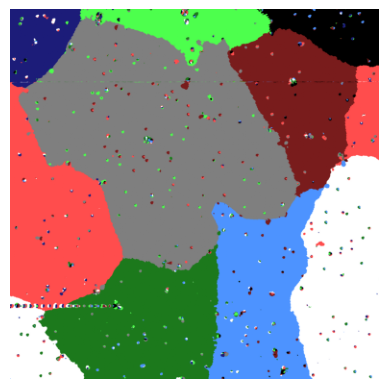

In [77]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from toolz import pipe,compose,partial
from skimage.measure import label
from skimage import segmentation

# Relative path to the image
image_paths = ['solLatt_shiftmap_noCrop.png',
'iccdw_kmap_ik0_idt0.png',
'iccdw_kmap_ik1_idt0.png',
'iccdw_kmap_ik2_idt0.png',
'segment9.png']

# Load the image
imgs = list(map(mpimg.imread, image_paths))

# Display the image
plt.imshow(imgs[4])
plt.axis('off')  # Hide axes
plt.show()


In [121]:
foo.shape

(385, 384, 3)

In [ ]:
from imagingPhase import visPhase as vp
cset = vp.DomainColoring._set_defualt_clrset()
img = imgs[4][:,:,0:3]
bws = []
for ii in range(3):
    for jj in range(3):
        clr = cset[ii,jj].reshape(1,1,3)
        get_dist = lambda img,clr :np.sum(np.abs(img-clr),axis=-1)
        dist = get_dist(img,clr)
        bw = dist<.01
        bws.append(bw)


# for ii in range(3):
#     for jj in range(3):
bw_split = []       
def label_by_size(bw):
    from skimage.measure import label
    bw_labeled = label(bw)
    lblList = np.unique(bw_labeled)
    foo = bw_labeled[:,:,np.newaxis] == lblList.reshape(1,1,-1)
    argsort = foo.sum(axis=0).sum(axis=0).argsort()
    bw_stack = foo[:,:,argsort[::-1]]
    return bw_stack
def big_one(bw):
    bw_stack = label_by_size(bw)
    return bw_stack[:,:,1]
bw = bws[6]
bw_stack =  label_by_size(bw)
bw_split.append(bw_stack[:,:,1])
bw_split.append(bw_stack[:,:,2])
bw = bws[7]
bw_stack =  label_by_size(bw)
bw_split.append(bw_stack[:,:,1])
bw_split.append(bw_stack[:,:,2]+bw_stack[:,:,3])
bws_full = bws[0:6]
bws_full.append(bws[8])

bws_full = bws_full+bw_split
bws_full = np.stack(bws_full,axis=-1)

In [275]:
bws_full.shape

(385, 384, 11)

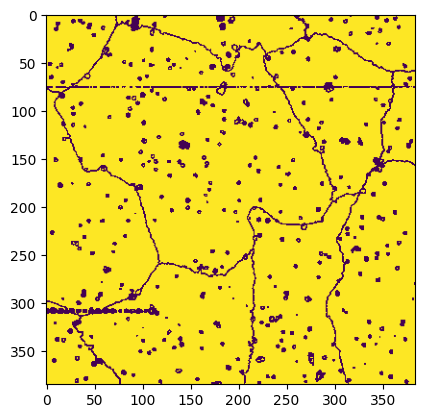

In [276]:
plt.imshow(bws_full.sum(axis=-1))

In [304]:
bws_full

array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, Fal

In [307]:
bws_full.shape
lbl3.shape

(1, 1, 11)

In [ ]:
T

In [308]:
bws_full[3]*3

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [309]:
lbl3 =np.arange(1,12).reshape(1,1,11)
lbl_full = (bws_full)*lbl3
lbl_full =lbl_full.sum(axis=-1) 


In [310]:
lbl_full

array([[ 7,  7,  7, ...,  6,  6,  6],
       [ 7,  7,  7, ...,  6,  6,  6],
       [ 7,  7,  7, ...,  6,  6,  6],
       ...,
       [11, 11, 11, ..., 10, 10, 10],
       [11, 11, 11, ..., 10, 10, 10],
       [ 0, 11, 11, ..., 10, 10, 10]])

In [312]:
lbl_full

array([[ 7,  7,  7, ...,  6,  6,  6],
       [ 7,  7,  7, ...,  6,  6,  6],
       [ 7,  7,  7, ...,  6,  6,  6],
       ...,
       [11, 11, 11, ..., 10, 10, 10],
       [11, 11, 11, ..., 10, 10, 10],
       [ 0, 11, 11, ..., 10, 10, 10]])

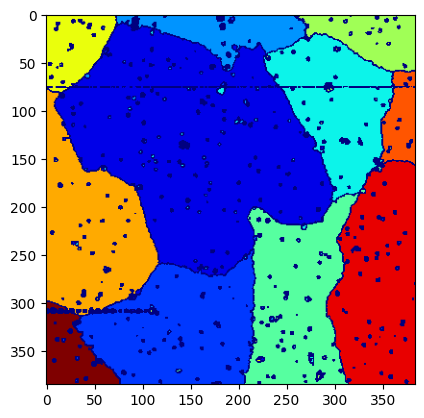

In [311]:
plt.imshow(lbl_full,cmap ='jet')


In [285]:
import numpy as np
from scipy.ndimage import distance_transform_edt

# mask_stack: 사용자가 가진 마스크들 (H, W) 형태의 정수 레이블 맵이라고 가정
# 0은 빈 공간(Background), 1, 2, 3... 은 각 영역
def fill_gaps_nearest(label_map):
    # 0이 아닌 부분(유효 영역)에 대한 인덱스를 구함
    # distance_transform_edt의 return_indices=True 등을 응용하거나
    # 아래와 같이 nearest interpolation을 수행할 수 있습니다.
    
    # 1. 유효 영역과 빈 영역 구분 (0이면 True)
    mask = (label_map == 0)
    
    # 2. 가장 가까운 유효 픽셀까지의 거리와 인덱스 계산
    # indices[0]은 y좌표, indices[1]은 x좌표의 매핑
    distances, indices = distance_transform_edt(mask, return_indices=True)
    
    # 3. 빈 픽셀을 가장 가까운 유효 픽셀의 값으로 대치
    filled_map = label_map[tuple(indices)]
    
    return filled_map

In [313]:
lbl_fin = fill_gaps_nearest(lbl_full)

In [314]:
lbl_fin

array([[ 7,  7,  7, ...,  6,  6,  6],
       [ 7,  7,  7, ...,  6,  6,  6],
       [ 7,  7,  7, ...,  6,  6,  6],
       ...,
       [11, 11, 11, ..., 10, 10, 10],
       [11, 11, 11, ..., 10, 10, 10],
       [11, 11, 11, ..., 10, 10, 10]])

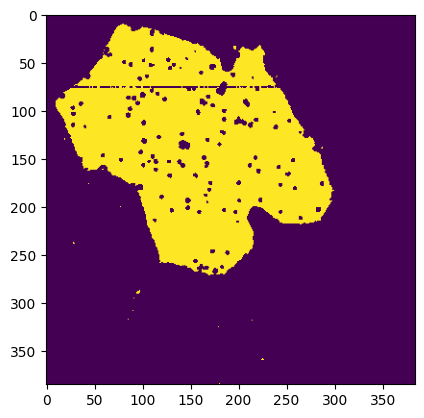

In [323]:
plt.imshow(lbl_full==1)

In [164]:
np.unique(labeled_bw)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int32)

In [188]:
# plt.imshow(bws[8])#67 have to be seperated
# from scipy.ndimage import label
from skimage.measure import label


bw = bws[6]
# labeled_bw = label_by_size(bw)
# plt.imshow(labeled_bw==1)
bw_labeled = label(bw)
lblList = np.unique(bw_labeled)

In [ ]:
plt.imshow()

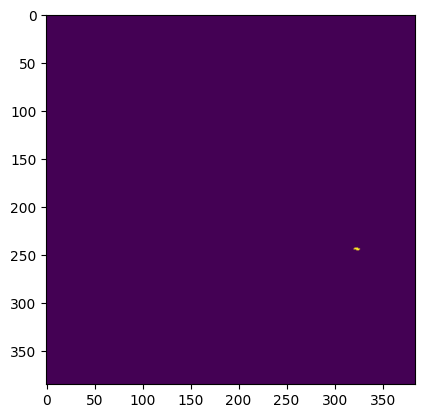

In [226]:
bw_stack.shape

(385, 384, 24)

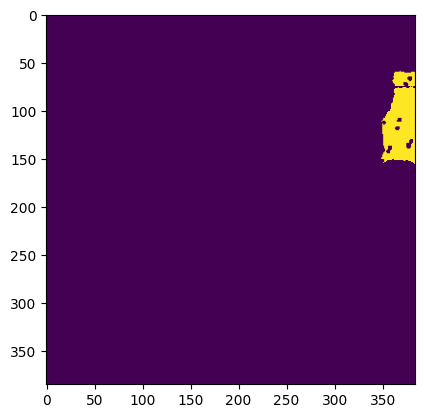

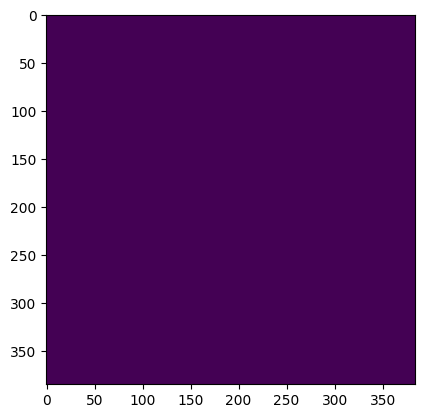

In [133]:
import numpy as np

def get_color_mask(img: np.ndarray, clr: np.ndarray, threshold: float = 30.0) -> np.ndarray:
    """
    Returns a boolean mask where pixels in img are close to clr within a threshold.
    
    Args:
        img: Input image (H, W, C)
        clr: Target color (C,)
        threshold: Distance threshold for color similarity
        
    Returns:
        Boolean mask (H, W)
    """
    # Calculate Euclidean distance between each pixel and the target color
    distances = np.linalg.norm(img - clr, axis=-1)
    return distances < threshold
foo = get_color_mask(img,clr,threshold = 0)
plt.imshow(foo)

np.int64(0)

In [102]:
import numpy as np
np.unique(labels)

array([1, 2, 3, 4, 5, 6])

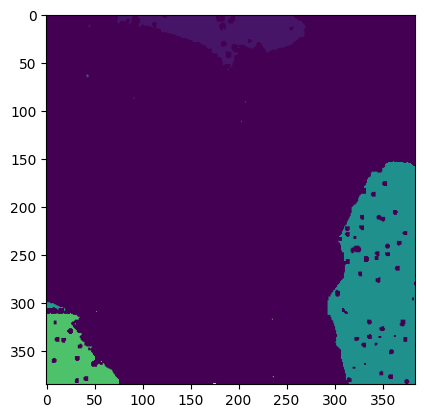

In [ ]:
labels = segmentation.slic(imgs[4][:,:,0:3],n_segments=11,compactness=.001)
labels = label(imgs[4][:,:,0])
plt.imshow(labels)
plt.show()
cs
# pipe(
#     imgs[4],
#     segmentation.slic,
    
# )

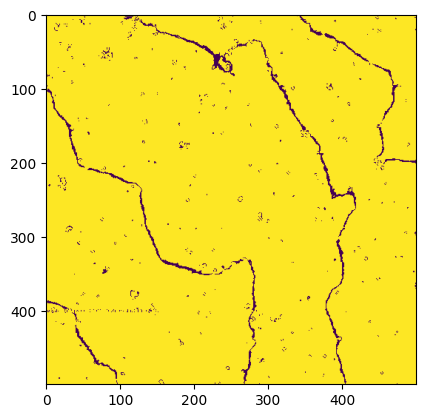

In [72]:
threshold = lambda gray,t: gray>t
rgbmaxel = lambda img: img[:,:,0:3].max(axis=2)
pipe(imgs[3], rgbmaxel,partial(threshold, t=.5),plt.imshow)

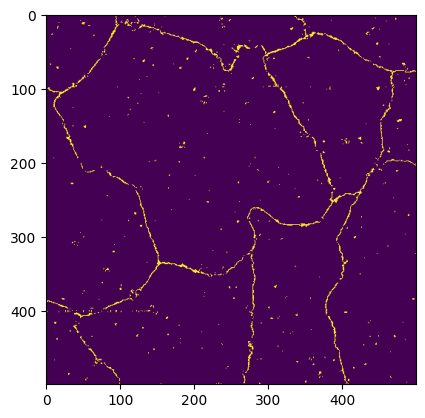

In [ ]:
rgball = lambda img: img[:,:,0]*img[:,:,1]*img[:,:,2]

pipe(imgs[0],
rgball,
partial(threshold,.4),
#partial(label,connectivity=1),
plt.imshow)